# 机器学习作业 5 - 支持向量机

## 在本作业练习中，我们将使用支持向量机（SVM）来构建垃圾邮件分类器。本次作业内容包括：

（1）从一些简单的2D数据集开始使用SVM来查看它们的工作原理。 观察不同的C值对分类结果的影响，了解高斯核函数用于非线性分类的用法。

（2）对一组原始电子邮件进行一些预处理工作，并使用SVM在处理的电子邮件上构建分类器，以确定它们是否为垃圾邮件。

## 1. 观察不同的C值对分类效果的影响。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

（1）将数据用散点图表示，其中类标签由符号表示（+表示正类，o表示负类）

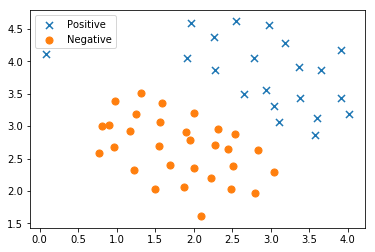

In [5]:
raw_data = loadmat('data/hw5data1.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])] #y包含标记1的为正例
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

In [6]:
def plotDecisionBoundary(clf,data):  # 绘制超平面函数
    x_min, x_max=np.array(data['X1']).min(), np.array(data['X1']).max()
    y_min, y_max=np.array(data['X2']).min(), np.array(data['X2']).max()
    xx, yy=np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contour(xx,yy,Z,colors = 'red') 

（2）调用scikit-learn中的svm.LinearSVC库来执行SVM。初始的C值为1。关于scikit-learn的帮助，请自行查阅资料学习（http://sklearn.apachecn.org/#/docs/68）

In [8]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000) # 初始化一个分类器

（3）尝试不同的C值，观察对结果的影响。先看一下C=1的结果。

In [9]:
clfs1=svc.fit(data[['X1', 'X2']], data['y']) # 训练分类器
svc.score(data[['X1', 'X2']], data['y']) # 计算准确率

F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

其次，让我们看看如果C的值越大，会发生什么，例如C=100。

In [13]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
clfs2=svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])
# 注意，结果可能不唯一，请回答为什么？
# 因为，参数C属于SVM中的惩罚参数，C越大对误分类的样本惩罚越多。增大C的值将会使得，对训练集样本的预测精确度提高，但是降低了泛化能力。

F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

通过增大C的值，可以得到准确率接近1的完美分类结果，但是决策边界并不理想。 通过两种方法可以看出来这种不理想的情况：

a. 查看每个类别预测的<font color=red>置信水平</font>，即样本点与超平面距离的函数。

b. 绘制决策边界（超平面）

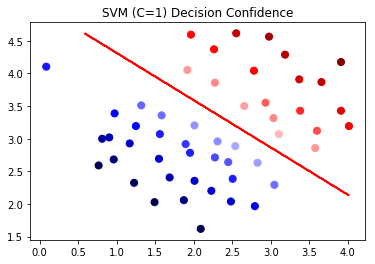

In [14]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
plotDecisionBoundary(clfs1,data) 
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

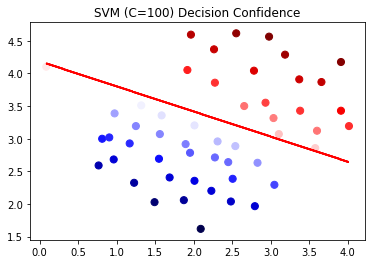

In [15]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
plotDecisionBoundary(clfs2,data) 
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

# 请回答生成的散点图，颜色深浅的含义
# 红色和蓝色的深浅分辨代表的含义是：

## 2. 高斯核函数

（1）现在我们将从线性SVM转移到能够使用核函数进行非线性分类的SVM。 
我们不使用scikit-learn中内置的高斯核函数，请自行实现。

In [20]:
# 实现高斯核函数
def gaussian_kernel(x1, x2, sigma):
#     k(x,x′)=e−||x−x′||22σ2
    
    return np.exp( -1* np.sum((x1-x2)**2) / (2*sigma**2) ) #请在这里补充一行代码来完成高斯核函数的实现


In [21]:
x1 = np.array([1.0, 1.0, 2.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

#此处的结果将在作业的客观题中作答


0.09301448921066349

（2）接下来，我们换另一个数据集，这次用非线性决策边界。

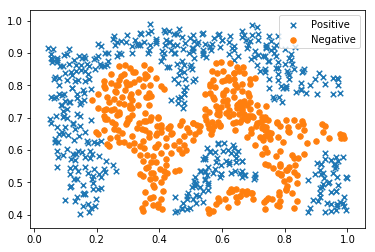

In [22]:
raw_data = loadmat('data/hw5data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()
plt.show()

（3）对于该数据集，我们将使用内置的高斯核函数RBF构建支持向量机分类器，并检查其对训练数据的准确性。 

为了可视化决策边界，这一次我们将根据负样本的预测概率来对点做红色阴影。

同时，我们还可以绘制决策边界来进行观察，请自行添加代码。

In [23]:
svc3 = svm.SVC(C=100, gamma=10, kernel='rbf', probability=True)
# 查阅svm.SVC相关资料，回答此处的gamma参数和rbf核函数的关系
# gamma代表：gamma数值上表示 1/2*sigma**2 
clfs3=svc3.fit(data[['X1', 'X2']], data['y'])
svc3.score(data[['X1', 'X2']], data['y'])


0.9698725376593279

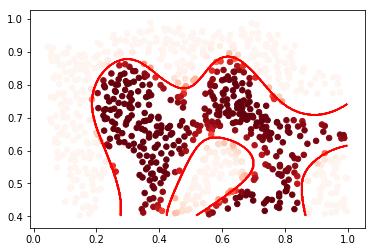

In [24]:
data['Probability'] = svc3.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(6,4))
# 此处补充一行代码绘制决策边界
plotDecisionBoundary(clfs3,data) 


ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')
plt.show()

## 3. 寻找最优参数
接下来，我们使用第三个数据集，该数据集包括训练和验证集，并且基于验证集性能为SVM模型找到最优超参数。
尽管我们可以使用scikit-learn的内置网格搜索来做到这一点，但是为了帮助大家更好的理解网格搜索原理，我们将从头开始实现一个简单的网格搜索。

In [32]:
raw_data = loadmat('data/hw5data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        #此处补充完善3行代码，完成网格搜索
        svc = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)
        clfs = svc.fit(X,y)
        score = svc.score(X,y)
        #补充结束
        
#         raw_data = loadmat('data/hw5data2.mat')

# data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
# data['y'] = raw_data['y']
#         svc3 = svm.SVC(C=100, gamma=10, kernel='rbf', probability=True)
#         clfs3=svc3.fit(data[['X1', 'X2']], data['y'])
#         svc3.score(data[['X1', 'X2']], data['y'])
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.995260663507109, {'C': 100, 'gamma': 100})

## 构建垃圾邮件过滤器
现在，我们开始使用SVM来构建垃圾邮件过滤器。 
在本部分的样本数据中，包括spamTrina.mat和spamTest.mat，分别对应的是训练集和测试集。
我们已经对垃圾邮件数据进行了预处理：例如，去除邮件中的HTML标记，只保留纯文本信息，将邮件中的字词映射到字典中。

In [33]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

# 观察 spam_train 训练集中的数据
spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [34]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

# 观察X, y, Xtest, ytest 形状
X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

我们能看到每个邮件已经转换为一个向量，其中1,899个维对应于词汇表中的1,899个单词。 它们的值为二进制，表示邮件中是否存在单词。 我们用测试集数据来评估一下训练的效果。

In [43]:
#这里使用svm.SVC的默认参数来进行训练，请回答C和gamma的默认值是多少
# C的默认值为1.0   
# gamma的默认值为1/1899
svc = svm.SVC(gamma=1/1000)
svc.fit(X, y)
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))

Training accuracy = 96.78%


In [44]:
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

Test accuracy = 97.2%


上面的结果是使用默认参数的，测试集精度已经达到了95.3%，<font color=red>请尝试参数调整来获得更高的精度（如96%以上）</font>。

本次作业到这里就结束了。